# BA, $n_\mathrm{p} = 1$, $512^2$

| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/06/2024          |
| Updated |  10/29/2024          |

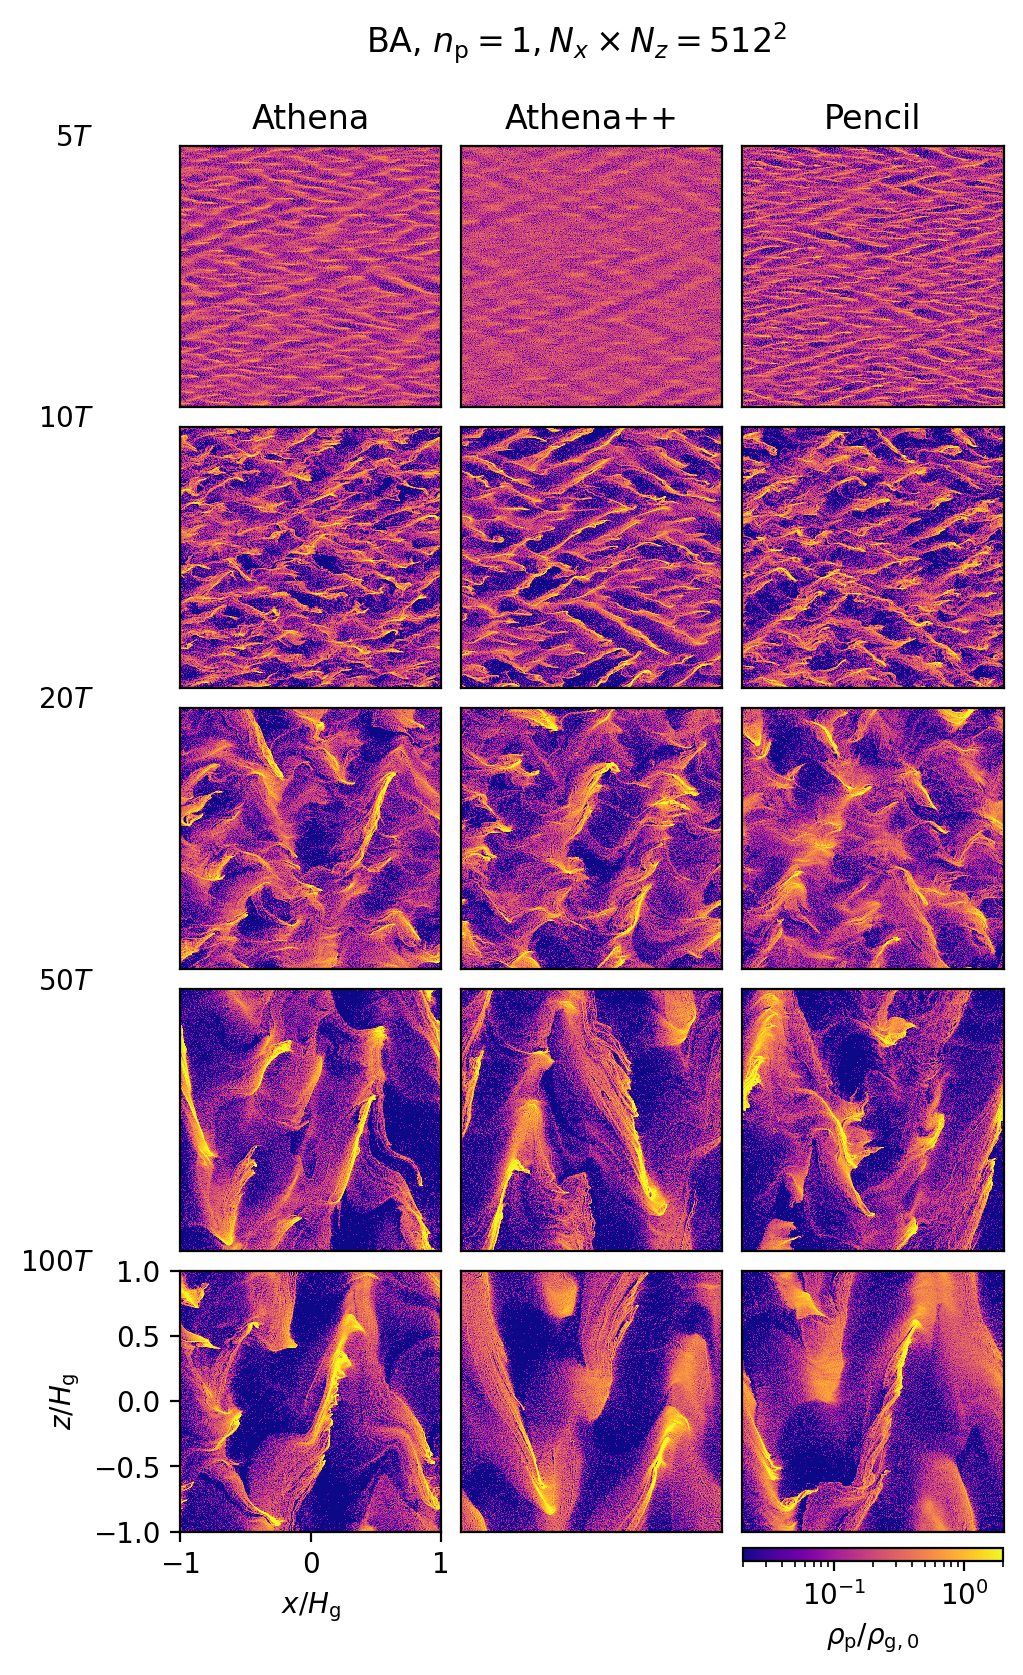

In [2]:
#===============================================================================
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

root = f'/home/stanley/github/sabaronett/sicc/data/'
model = 'unstratified'
problem = 'BA'
n_p = 1
res = 512
variation = f'dust_particles/np{n_p}/{res}'
codes = ['Athena', 'Athena++', 'Pencil']
times = ['5', '10', '20', '50', '100'] # TODO: Try/Except for '0'
vmin, vmax = 2e-2, 2e0 # BA CPDD > 85%; CPDD < 5%
fig = plt.figure(figsize=(6, 9), dpi=200)
fig.suptitle(rf'{problem}, $n_\mathrm{{p}} = {n_p}, N_x \times N_z = {res}^2$',
             y=0.95)
ax_grid = AxesGrid(fig, 111, nrows_ncols=(len(times), len(codes)),
                   direction='column', axes_pad=0.1, share_all=True,
                   label_mode='1')

for j, code in enumerate(codes):
    path = f'{root}/{model}/{problem}/{variation}/{code}'
    ax_grid[j*len(times)].set_title(code)
    grid = np.load(f'{path}/grid.npz')
    for i, time in enumerate(times):
        rhop = np.load(f'{path}/rhop{time}.npz')['rhop']
        clip = np.clip(rhop, vmin, vmax)
        pcm = ax_grid[j*len(times)+i].pcolormesh(grid['x'], grid['z'], clip,
                                                 cmap='plasma', rasterized=True,
                                                 norm=colors.LogNorm(vmin=vmin,
                                                                     vmax=vmax))
        if j == 0:
            ax_grid[i].text(-0.33, 1, rf'{time}$T$', ha='right',
                            transform=ax_grid[i].transAxes)
        ax_grid[j*len(times)+i].tick_params(bottom=False, left=False)

x = ax_grid[-1].get_position().x1 + 0.02 # TODO: OPTMIZE
plt.colorbar(pcm, orientation='horizontal', shrink=0.28, anchor=(x, -0.15),
             label=r'$\rho_\mathrm{p}/\rho_\mathrm{g,0}$')
ax_grid[len(times)-1].set(xlabel=r'$x/H_\mathrm{g}$', ylabel=r'$z/H_\mathrm{g}$')
ax_grid[len(times)-1].tick_params(bottom=True, left=True)
plt.savefig(f'BA-np1-512.png', dpi=600, bbox_inches='tight', pad_inches=0.01)
